In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score

In [2]:
# Load the dataset
olympic_df = pd.read_csv('../Resources/Machine_Learning_datasetv3.csv')
olympic_df = olympic_df.drop([ 'athlete_count_y'], axis=1)
olympic_df = olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
summer_olympic_df = olympic_df[olympic_df['Season'] == 'Summer']
summer_olympic_df

,Country,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share,athlete_share,Lattitude,Longitude
0,0,AFG,1960.0,Summer,0.0,13.0,8.996967e+06,1326,0.0,0.0,0.0,0.0,297.0,0.000000,0.002466,NaN,NaN
1,1,ARG,1960.0,Summer,0.0,78.0,2.048178e+07,8861,0.0,1.0,1.0,2.0,297.0,0.006734,0.014795,NaN,NaN
2,2,AUS,1960.0,Summer,0.0,201.0,1.027648e+07,14013,8.0,8.0,6.0,22.0,297.0,0.074074,0.038126,NaN,NaN
3,3,AUT,1960.0,Summer,0.0,161.0,7.047539e+06,10391,1.0,1.0,0.0,2.0,297.0,0.006734,0.030539,NaN,NaN
4,4,BEL,1960.0,Summer,0.0,103.0,9.153489e+06,11081,0.0,2.0,2.0,4.0,297.0,0.013468,0.019537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,China,CHN,2020.0,Summer,0.0,406.0,1.410929e+09,10484,0.0,0.0,0.0,88.0,1080.0,0.081481,0.035357,35.000074,104.999927
2593,Italy,ITA,2020.0,Summer,0.0,381.0,5.955402e+07,31288,0.0,0.0,0.0,40.0,1080.0,0.037037,0.033179,42.638426,12.674297
2596,Japan (Host),JPN,2020.0,Summer,1.0,556.0,1.258360e+08,40146,0.0,0.0,0.0,0.0,1080.0,0.000000,0.048419,36.204824,138.252924
2639,Norway,NOR,2020.0,Summer,0.0,75.0,5.379475e+06,67176,0.0,0.0,0.0,8.0,1080.0,0.007407,0.006531,64.573154,11.528036


In [3]:
# selecting summer 2020 actual medals

summer_olympic_actual_df = summer_olympic_df[summer_olympic_df['Year'] == 2020]

In [4]:
#Selecting columns for summer 2020 actual medals
summer_olympic_actual_df = summer_olympic_actual_df[['country_medal_total']]

In [5]:
# Removing 2020
summer_olympics_test_df = summer_olympic_df[summer_olympic_df['Year'] != 2020]

In [6]:
# Summer olympics machine learning dataframe
summer_olympics_test_df = summer_olympics_test_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total'], axis=1)
summer_olympics_test_df

,Country,Host,Population,gdp_per_capita,medal_share,athlete_share,Lattitude,Longitude
0,0,0.0,8996967.0,1326,0.000000,0.002466,NaN,NaN
1,1,0.0,20481781.0,8861,0.006734,0.014795,NaN,NaN
2,2,0.0,10276477.0,14013,0.074074,0.038126,NaN,NaN
3,3,0.0,7047539.0,10391,0.006734,0.030539,NaN,NaN
4,4,0.0,9153489.0,11081,0.013468,0.019537,NaN,NaN
...,...,...,...,...,...,...,...,...
2173,2173,0.0,1025104.0,15696,0.002959,0.002875,NaN,NaN
2174,2174,0.0,5786482.0,4095,0.000000,0.001027,NaN,NaN
2175,2175,0.0,40189561.0,6110,0.000000,0.005749,NaN,NaN
2176,2176,0.0,218035000.0,27058,0.278107,0.091376,NaN,NaN


In [7]:
# Summer olympics machine learning dataframe
summer_olympics_test_df = summer_olympics_test_df.drop(['Lattitude', 'Longitude', 'Country'], axis=1)
summer_olympics_test_df

,Host,Population,gdp_per_capita,medal_share,athlete_share
0,0.0,8996967.0,1326,0.000000,0.002466
1,0.0,20481781.0,8861,0.006734,0.014795
2,0.0,10276477.0,14013,0.074074,0.038126
3,0.0,7047539.0,10391,0.006734,0.030539
4,0.0,9153489.0,11081,0.013468,0.019537
...,...,...,...,...,...
2173,0.0,1025104.0,15696,0.002959,0.002875
2174,0.0,5786482.0,4095,0.000000,0.001027
2175,0.0,40189561.0,6110,0.000000,0.005749
2176,0.0,218035000.0,27058,0.278107,0.091376


In [8]:
# independent and dependent variables
X = summer_olympics_test_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
y = summer_olympics_test_df[['medal_share']]

In [9]:
# Create and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6723513524083558
Testing Score: 0.6556695045455943


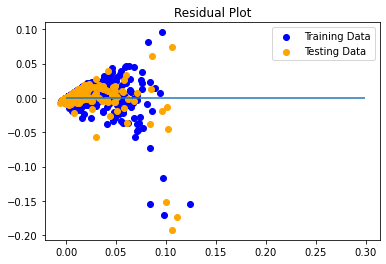

In [10]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [11]:
# 2020 predicted dataset
summer_olympic_predicted_df = summer_olympic_df[summer_olympic_df['Year'] == 2020]
summer_olympic_predicted_df = summer_olympic_predicted_df.drop(['NOC', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total', 'medal_share'], axis=1)
summer_olympic_predicted_df = summer_olympic_predicted_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
summer_olympic_predicted_df

,Population,gdp_per_capita,Host,athlete_share
2543,1.410929e+09,10484,0.0,0.035357
2593,5.955402e+07,31288,0.0,0.033179
2596,1.258360e+08,40146,1.0,0.048419
2639,5.379475e+06,67176,0.0,0.006531
2698,3.294841e+08,63416,0.0,0.053383


In [12]:
# Predictions
summer_predictions = model.predict(summer_olympic_predicted_df)
summer_predictions_df = pd.DataFrame(summer_predictions, summer_olympic_predicted_df.index)
summer_predictions_df.columns =['medal_share_predicted']
summer_predictions_df

,medal_share_predicted
2543,0.066901
2593,0.041737
2596,0.070090
2639,0.003495
2698,0.072689


In [13]:
# Merge dataframes
summer_predicted_df = summer_olympic_predicted_df.merge(summer_predictions_df, left_index=True, right_index=True )
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted
2543,1.410929e+09,10484,0.0,0.035357,0.066901
2593,5.955402e+07,31288,0.0,0.033179,0.041737
2596,1.258360e+08,40146,1.0,0.048419,0.070090
2639,5.379475e+06,67176,0.0,0.006531,0.003495
2698,3.294841e+08,63416,0.0,0.053383,0.072689


In [14]:
# Setting minimum medals at 0
summer_predicted_df['positive_medal_share'] = np.where(summer_predicted_df['medal_share_predicted'] < 0, 0, summer_predicted_df['medal_share_predicted'])
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689


In [15]:
# Determine predicted medal counts with 1080 total medals from 2020 summer olympics
summer_predicted_df['predicted_medals'] = summer_predicted_df['positive_medal_share'] * 1080
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901,72.253372
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737,45.075927
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090,75.696784
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495,3.774560
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689,78.503779


In [16]:
# Add in NOCs
predicted_NOC_df = summer_olympic_df[summer_olympic_df['Year'] == 2020]
predicted_NOC_df = predicted_NOC_df[['NOC']]
predicted_NOC_df

,NOC
2543,CHN
2593,ITA
2596,JPN
2639,NOR
2698,USA


In [17]:
# Merge final NOC to summer predicted
summer_predicted_df = summer_predicted_df.merge(predicted_NOC_df, left_index=True, right_index=True )
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901,72.253372,CHN
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737,45.075927,ITA
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090,75.696784,JPN
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495,3.774560,NOR
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689,78.503779,USA


In [18]:
# create summer final dataframe

summer2020_ML_final_df = summer_predicted_df.merge(summer_olympic_actual_df, left_index=True, right_index=True)

In [19]:
summer2020_ML_final_df['Difference_Acutal_Predicted'] = summer2020_ML_final_df['country_medal_total'] - summer2020_ML_final_df['predicted_medals']
summer2020_ML_final_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901,72.253372,CHN,88.0,15.746628
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737,45.075927,ITA,40.0,-5.075927
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090,75.696784,JPN,0.0,-75.696784
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495,3.774560,NOR,8.0,4.225440
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689,78.503779,USA,113.0,34.496221


In [20]:
#adding season and year columns back for viz
summer2020_ML_final_df['Year'] = '2020'
summer2020_ML_final_df['Season'] = 'summer'
summer2020_ML_final_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted,Year,Season
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901,72.253372,CHN,88.0,15.746628,2020,summer
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737,45.075927,ITA,40.0,-5.075927,2020,summer
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090,75.696784,JPN,0.0,-75.696784,2020,summer
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495,3.774560,NOR,8.0,4.225440,2020,summer
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689,78.503779,USA,113.0,34.496221,2020,summer


In [21]:
Summer2020_filtered_df = summer2020_ML_final_df.loc[(summer2020_ML_final_df['NOC'] == 'USA') | (summer2020_ML_final_df['NOC'] == 'NOR') | (summer2020_ML_final_df['NOC'] == 'ITA') | (summer2020_ML_final_df['NOC'] == 'CHN') | (summer2020_ML_final_df['NOC'] == 'JPN') ]
Summer2020_filtered_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted,Year,Season
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901,72.253372,CHN,88.0,15.746628,2020,summer
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737,45.075927,ITA,40.0,-5.075927,2020,summer
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090,75.696784,JPN,0.0,-75.696784,2020,summer
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495,3.774560,NOR,8.0,4.225440,2020,summer
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689,78.503779,USA,113.0,34.496221,2020,summer


In [22]:
#correct Japan country_medal total

Summer2020_filtered_df.at[2596, 'country_medal_total'] = '58'

Summer2020_filtered_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted,Year,Season
2543,1.410929e+09,10484,0.0,0.035357,0.066901,0.066901,72.253372,CHN,88.0,15.746628,2020,summer
2593,5.955402e+07,31288,0.0,0.033179,0.041737,0.041737,45.075927,ITA,40.0,-5.075927,2020,summer
2596,1.258360e+08,40146,1.0,0.048419,0.070090,0.070090,75.696784,JPN,58.0,-75.696784,2020,summer
2639,5.379475e+06,67176,0.0,0.006531,0.003495,0.003495,3.774560,NOR,8.0,4.225440,2020,summer
2698,3.294841e+08,63416,0.0,0.053383,0.072689,0.072689,78.503779,USA,113.0,34.496221,2020,summer


In [23]:
y_true = Summer2020_filtered_df['country_medal_total']
y_pred = Summer2020_filtered_df['predicted_medals']
print(f"R-Squared: {r2_score(y_true, y_pred)}")



R-Squared: 0.7317759050517759


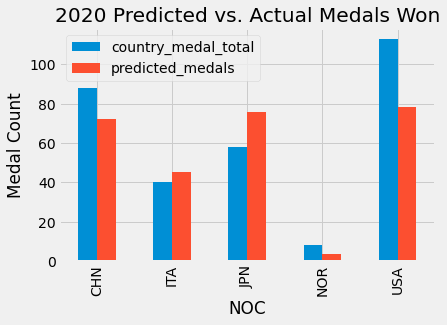

In [26]:
# Plot actual vs. predicted medals
plt.style.use('fivethirtyeight')
Summer2020_filtered_df.plot(x='NOC', y=['country_medal_total', 'predicted_medals'], kind='bar')
plt.title("2020 Predicted vs. Actual Medals Won")
plt.ylabel("Medal Count")
plt.xlabel("NOC")
plt.savefig("../Images/2020_Prediced_vs_actual.png", dpi=300, bbox_inches = "tight")

In [25]:
#summer2020_ML_final_df = summer2020_ML_final_df[['Year', 'Season', 'Country','NOC','Population', 'gdp_per_capita', 'athlete_share', 'Host', 'country_medal_total', 'medal_share_predicted', 'positive_medal_share','predicted_medals', 'Difference_Acutal_Predicted', 'Latitude', 'Longitude'  ]]
#summer2020_ML_final_df.to_csv('../Resources/summer2020_ML_final.csv', index=False)